## Fit OLS model using `mymodule` created in week 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import my_module
%matplotlib inline

In [2]:
x = np.array([1, 2, 4, 3, 5])
y = np.array([1, 3, 3, 2, 5])

### Recall, `my_module` uses this closed-form solution to fit Ordinary Least Squares (OLS):

![](https://github.com/visualizedata/ml/raw/master/week02/img/reg.png)

In [3]:
sr = my_module.SimpleRegression()
sr.fit(x, y)
print(sr.intercept_)
print(sr.coef_)

0.39999999999999947
0.8


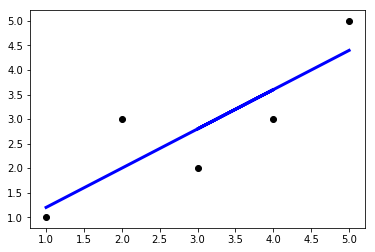

In [4]:
# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, sr.predict(x), color='blue', linewidth=3)
plt.show()

### What is the "cost" (error) of this model?

In [5]:
# predictions of y based on model
print(sr.predict(x))

[1.2 2.  3.6 2.8 4.4]


In [6]:
# actual y values
print(y)

[1 3 3 2 5]


In [7]:
# cost/error: difference between actual y and predicted y values
print(np.subtract(sr.predict(x), y))

[ 0.2 -1.   0.6  0.8 -0.6]


In [8]:
# errors, squared
print(np.square(np.subtract(sr.predict(x), y)))

[0.04 1.   0.36 0.64 0.36]


In [9]:
# sum of errors squared, a measure of "cost": 
print(np.sum(np.square(np.subtract(sr.predict(x), y))))

2.400000000000001


### What is the cost of a randomly selected weight? 

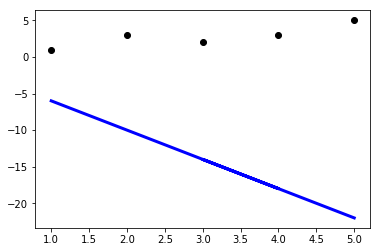

COST (error), linear model: 
2.400000000000001

COST (error), polynomial model: 
1644


In [10]:
randb0 = np.random.randint(-5, 6)
randb1 = np.random.randint(-5, 6)
plt.scatter(x, y,  color='black')
plt.plot(x, np.add([randb0], np.multiply([randb1], x)), color='blue', linewidth=3)
plt.show()

print("COST (error), linear model: ")
print(np.sum(np.square(np.subtract(sr.predict(x), y))))
print()

print("COST (error), polynomial model: ")
print(np.sum(np.square(np.subtract(np.add([randb0], np.multiply([randb1], x)), y))))

### The cost function for b1 in y = 0.8x + 0.4

What is the 'cost' of a b1 of -1.0?
3.24 

What is the 'cost' of a b1 of 1.0?
0.03999999999999998 

What is the 'cost' of a b1 of 0.8?
0.0 

What is the 'cost' of a random b1 of -305?
93513.64000000001 



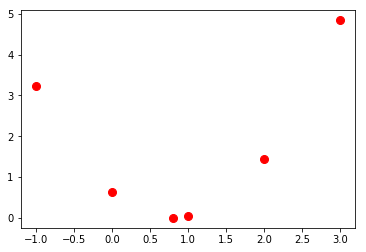

	y = ax**2 + bx + c


In [11]:
def get_cost(m):
    return (0.8 - m)**2

print("What is the 'cost' of a b1 of -1.0?")
print(get_cost(-1.0), '\n')

print("What is the 'cost' of a b1 of 1.0?")
print(get_cost(1.0), '\n')

print("What is the 'cost' of a b1 of 0.8?")
print(get_cost(0.8), '\n')

rand_wt = np.random.randint(-500, 500)
print("What is the 'cost' of a random b1 of " + str(rand_wt) + "?")
print(get_cost(rand_wt), '\n')

plt.plot(-1.0, get_cost(-1.0), marker='o', markersize=8, color="red")
plt.plot(1.0, get_cost(1.0), marker='o', markersize=8, color="red")
plt.plot(0.8, get_cost(0.8), marker='o', markersize=8, color="red")
plt.plot(0, get_cost(0), marker='o', markersize=8, color="red")
plt.plot(2.0, get_cost(2.0), marker='o', markersize=8, color="red")
plt.plot(3.0, get_cost(3.0), marker='o', markersize=8, color="red")
# plt.plot(rand_wt, get_cost(rand_wt), marker='o', markersize=3, color="red")
plt.show()

print("\ty = ax**2 + bx + c")

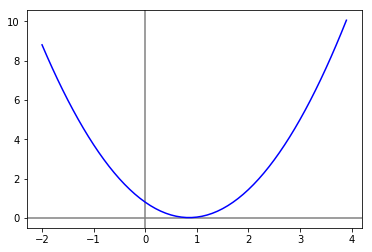

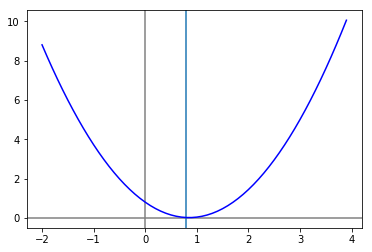

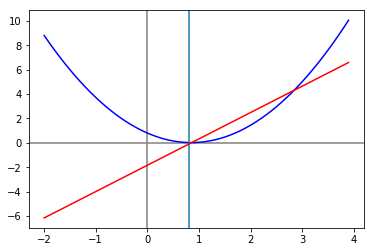

In [12]:
def cost_fn(m):
    """Returns the cost of a given weight for b1 in y=0.8x+0.4"""
    return 1.08 * m**2 - 1.84 * m + 0.8

def get_d(m):
    """Returns the derivative for a cost of a given weight for b1 in y=0.8x+0.4"""
    return 2 * 1.08 * m - 1.84

m = np.arange(-2, 4, 0.1)
cost = np.apply_along_axis(cost_fn, 0, m)
delta = np.apply_along_axis(get_d, 0, m)

plt.axhline(0, color="grey")
plt.axvline(0, color="grey")
plt.plot(m, cost, color="blue")
plt.show()

plt.axhline(0, color="grey")
plt.axvline(0, color="grey")
plt.axvline(x=0.8)
plt.plot(m, cost, color="blue")
plt.show()

# plt.axhline(0, color="grey")
# plt.axvline(0, color="grey")
# plt.plot(m, delta, color="red")
# plt.show()

plt.axhline(0, color="grey")
plt.axvline(0, color="grey")
plt.plot(m, cost, color="blue")
plt.axvline(x=0.8)
plt.plot(m, delta, color="red")
plt.show()

# add: how to take the derivative

### Could we lower the "cost" with a more complex (polynomial) model/fit? 

[-4.2         7.80952381 -2.85714286  0.33333333]


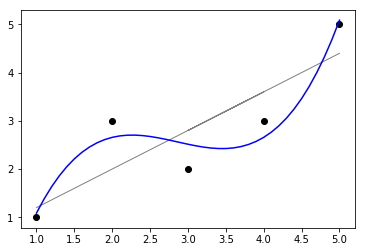

COST (error), linear model: 
2.400000000000001

COST (error), polynomial model: 
0.5142857142857106


In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
model = model.fit(x[:, np.newaxis], y)
print(model.named_steps['linear'].coef_)

x_reg = np.arange(1, 5.1, 0.1)
y_reg = model.predict(x_reg.reshape(-1, 1))

plt.scatter(x, y,  color='black')
plt.plot(x, sr.predict(x), color="grey", linewidth=1)
plt.plot(x_reg, y_reg, color="blue")
plt.show()

print("COST (error), linear model: ")
print(np.sum(np.square(np.subtract(sr.predict(x), y))))
print()

print("COST (error), polynomial model: ")
print(np.sum(np.square(np.subtract(model.predict(x.reshape(-1, 1)), y))))

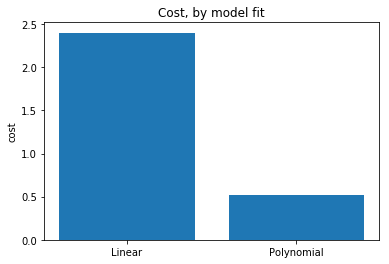

In [14]:
fits = ("Linear", "Polynomial")
y_pos = np.arange(len(fits))
plt.xticks(y_pos, fits)
plt.ylabel("cost")
plt.bar(y_pos, [np.sum(np.square(np.subtract(sr.predict(x), y))), np.sum(np.square(np.subtract(model.predict(x.reshape(-1, 1)), y)))])
plt.title("Cost, by model fit")
plt.show()